<a href="https://colab.research.google.com/github/pellurupooja/Walmart-Data-Analysis/blob/main/WalmartDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WALMART DATA ANALYSIS**

TASK IS TO ANALYZE THE SALES OF THE WALMART WITH THE DATA GIVEN (EG. ANALYSING WEEKLY SALES, WHICH STORE OR DEPARTMENT SELLS MOST, ETC.)<br>
<br>
DATA ANALYSIS AND VISUALIZATION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
train_df = pd.read_csv('train (1).csv')
test_df = pd.read_csv('test.csv')
features_df = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')

In [ ]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
train_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [ ]:
train_df.shape

(421570, 5)

In [ ]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [ ]:
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
test_df.shape

(115064, 4)

In [ ]:
test_df.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


In [ ]:
test_df.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [ ]:
features_df.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [ ]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
features_df.shape

(8190, 12)

In [ ]:
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [ ]:
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
stores.shape

(45, 3)

In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [ ]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [ ]:
dataset_m = features_df.merge(stores, how='inner', on='Store')
dataset_m.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [ ]:
dataset_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 903.8+ KB


In [ ]:
dataset_m.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
Type               0
Size               0
dtype: int64

In [ ]:
from datetime import datetime
# converting date to date time
dataset_m['Date'] = pd.to_datetime(dataset_m['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])
# Extract week and year from the date and make them into new columns
dataset_m['week'] = dataset_m.Date.dt.isocalendar().week
dataset_m['year'] = dataset_m.Date.dt.isocalendar().year

In [ ]:
dataset_m.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,week,year
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221,26,2013
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221,27,2013
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221,28,2013
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221,29,2013
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,B,118221,30,2013


CREATING A NEW DF BY MERGING (INEER) THE train_df AND THE NEW DATAFRAME dataset_m ON Store, date AND isholiday COLUMNS AND SORTING THE VALUES BY STORE, DEPARTMENT AND DATE

In [ ]:
train_df_1 = train_df.merge(dataset_m, how='inner', on=['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [ ]:
train_df_1.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,6,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,7,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,8,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,9,2010
5,1,1,2010-03-12,21043.39,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315,10,2010
6,1,1,2010-03-19,22136.64,False,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,A,151315,11,2010
7,1,1,2010-03-26,26229.21,False,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,A,151315,12,2010
8,1,1,2010-04-02,57258.43,False,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,A,151315,13,2010
9,1,1,2010-04-09,42960.91,False,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,A,151315,14,2010


VISUALIZATION

1) SCATTER PLOT

In [ ]:
def scatter(train_df_1, column):
  #plot the figure
  plt.figure()
  #plot the scatter plot with data from the specified column in x axis and weekly sales in y axis
  plt.scatter(train_df_1[column], train_df_1['Weekly_Sales'])
  #give y label as Weekly size
  plt.ylabel('Weekly_Sales')
  #give the x label as the column specified as parameter in the function
  plt.xlabel(column)

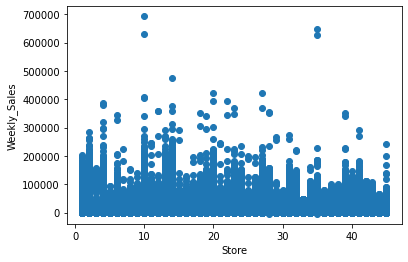

In [ ]:
#plot a scatter plot using the scatter plot function a scatter plot of weekly sales with respect to store
scatter(train_df_1, 'Store')

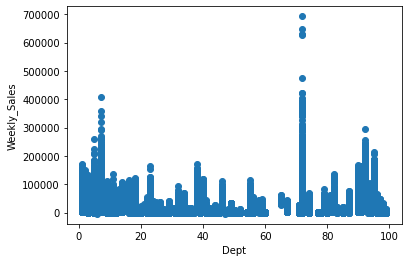

In [ ]:
#plot a scatter plot using the scatter plot function a scatter plot of weekly sales with respect to Department
scatter(train_df_1, 'Dept')

2) LINE PLOTS WOR WEEKLY SALES FOR EACH YEAR

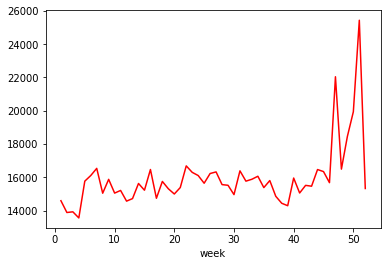

In [ ]:
# filtering out mean weekly sales for the year 2011
weekly_sales_2011 = train_df_1[train_df_1['year']==2011]['Weekly_Sales'].groupby(train_df_1['week']).mean()
# plot a line plot with week on x axid and sales for that particular week off the filtered year in y axis
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values, color='red')

In [ ]:
weekly_sales_2011

week
1     14599.244973
2     13891.283484
3     13932.367385
4     13566.239462
5     15773.448776
6     16111.706191
7     16541.991212
8     15049.747558
9     15882.557045
10    15056.450540
11    15216.115961
12    14573.827050
13    14726.869261
14    15634.571312
15    15229.708141
16    16472.653827
17    14745.946064
18    15757.215296
19    15317.204186
20    15002.247279
21    15390.233449
22    16691.305332
23    16302.918830
24    16111.226407
25    15649.418342
26    16232.862334
27    16328.646803
28    15566.323502
29    15526.204180
30    14965.150490
31    16393.126313
32    15774.068626
33    15888.028317
34    16068.095036
35    15387.122167
36    15809.069483
37    14865.566897
38    14446.431089
39    14298.824402
40    15960.678959
41    15062.736015
42    15521.325691
43    15470.924781
44    16471.071192
45    16348.811046
46    15683.546288
47    22043.563476
48    16496.511854
49    18458.853056
50    19942.149333
51    25437.146122
52    15332.154858
Name: W

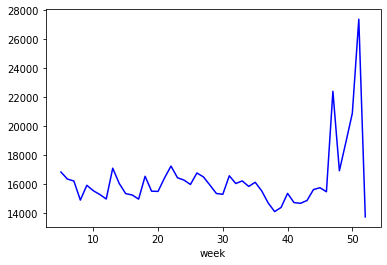

In [ ]:
# filtering out mean weekly sales for the year 2010
weekly_sales_2010 = train_df_1[train_df_1['year']==2010]['Weekly_Sales'].groupby(train_df_1['week']).mean()
# plot a line plot with week on x axid and sales for that particular week off the filtered year in y axis
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values, color='blue')

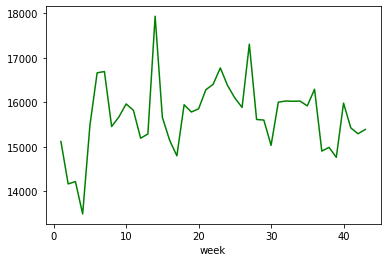

In [ ]:
# filtering out mean weekly sales for the year 2012
weekly_sales_2012 = train_df_1[train_df_1['year']==2012]['Weekly_Sales'].groupby(train_df_1['week']).mean()
# plot a line plot with week on x axid and sales for that particular week off the filtered year in y axis
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values, color='g')

3) COMBINE PLOTS FOR EACH YEAR (2010,2011,2012)<br>
PLOTTING THE WEEKLY SALES FOR YEARS 2010, 2011, 2012 ON A SINGLE PLOT TO COMPARE THE SALES VALUES WITH RESPECT TO WEEK ON EACH OF THESE SPECIFIED YEAR FOR COMPARING THE WEEKLY SALES IN EACH YEAR

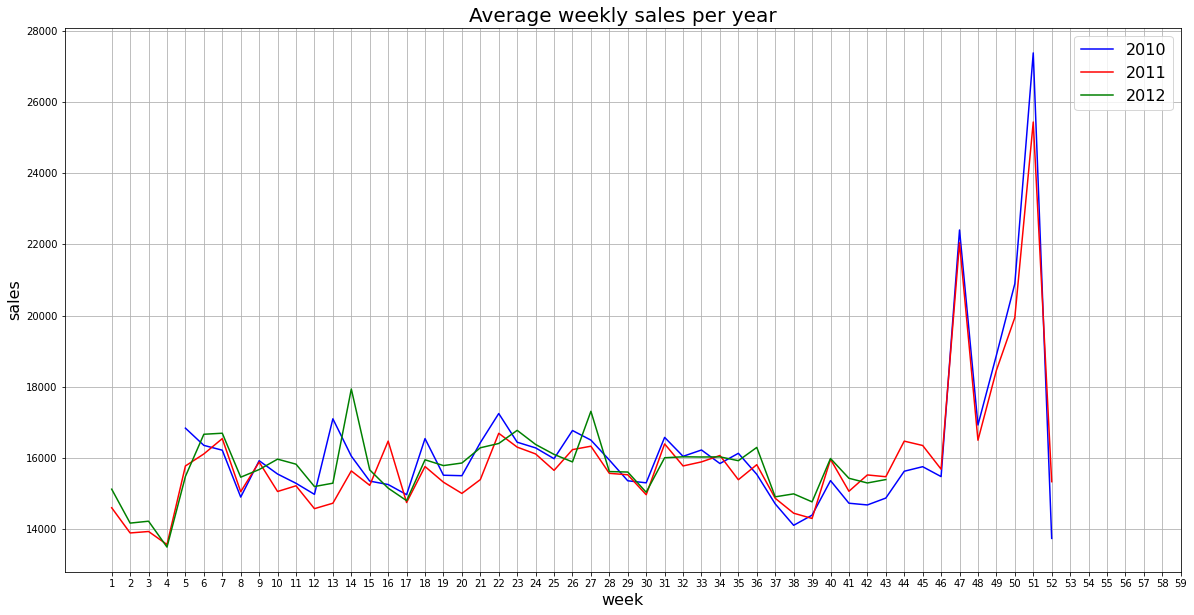

In [ ]:
#plotting a figure
plt.figure(figsize=(20,10))
#plotting three line plots for weekly sales of each year
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values, color='blue')
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values, color='red')
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values, color='g')
plt.grid()

#plot labels and legends
plt.xticks(np.arange(1,60,step=1))
plt.title('Average weekly sales per year', fontsize=20)
plt.xlabel('week',fontsize=16)
plt.ylabel('sales',fontsize=16)
plt.legend(['2010','2011','2012'], fontsize=16)
plt.show()

4) HISTOGRAM

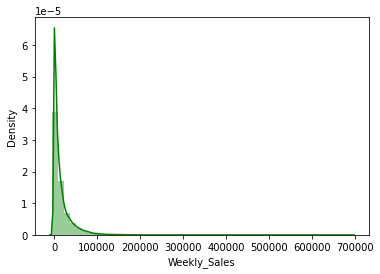

In [ ]:
sns.distplot(train_df_1['Weekly_Sales'], color='g')

Kurtosis- measure of whether data is heavy-tailed or light-tailed relative to normal distribution

In [ ]:
train_df_1['Weekly_Sales'].kurt()

21.49128990832619

6) BAR CHART ON DATA FRAME

In [ ]:
weekly_sales_stores = train_df_1['Weekly_Sales'].groupby(train_df_1['Store']).mean()

In [ ]:
weekly_sales_stores.head()

Store
1    21710.543621
2    26898.070031
3     6373.033983
4    29161.210415
5     5053.415813
Name: Weekly_Sales, dtype: float64

In [ ]:
weekly_sales_stores_df = pd.DataFrame(weekly_sales_stores)

In [ ]:
weekly_sales_stores_df.sort_values('Weekly_Sales',ascending=False).style.bar(align='left',width=98,color='green')

,Weekly_Sales
Store,
20,29508.301592
4,29161.210415
14,28784.851727
13,27355.136891
2,26898.070031
10,26332.303819
27,24826.984536
6,21913.243624
1,21710.543621


In [ ]:
weekly_sales_stores_df.sort_values('Weekly_Sales').style.bar(align='left',width=98,color='green')

,Weekly_Sales
Store,
5,5053.415813
33,5728.414053
44,6038.929814
3,6373.033983
38,7492.478460
16,7863.224124
29,8158.810609
7,8358.766148
36,8584.412563


PLOTTING A BAR GRAPH WITH STORE NUMBER AS x VALUES AND MEAN WEEKLY SALES FOR THAT STORE AS y VALUES.

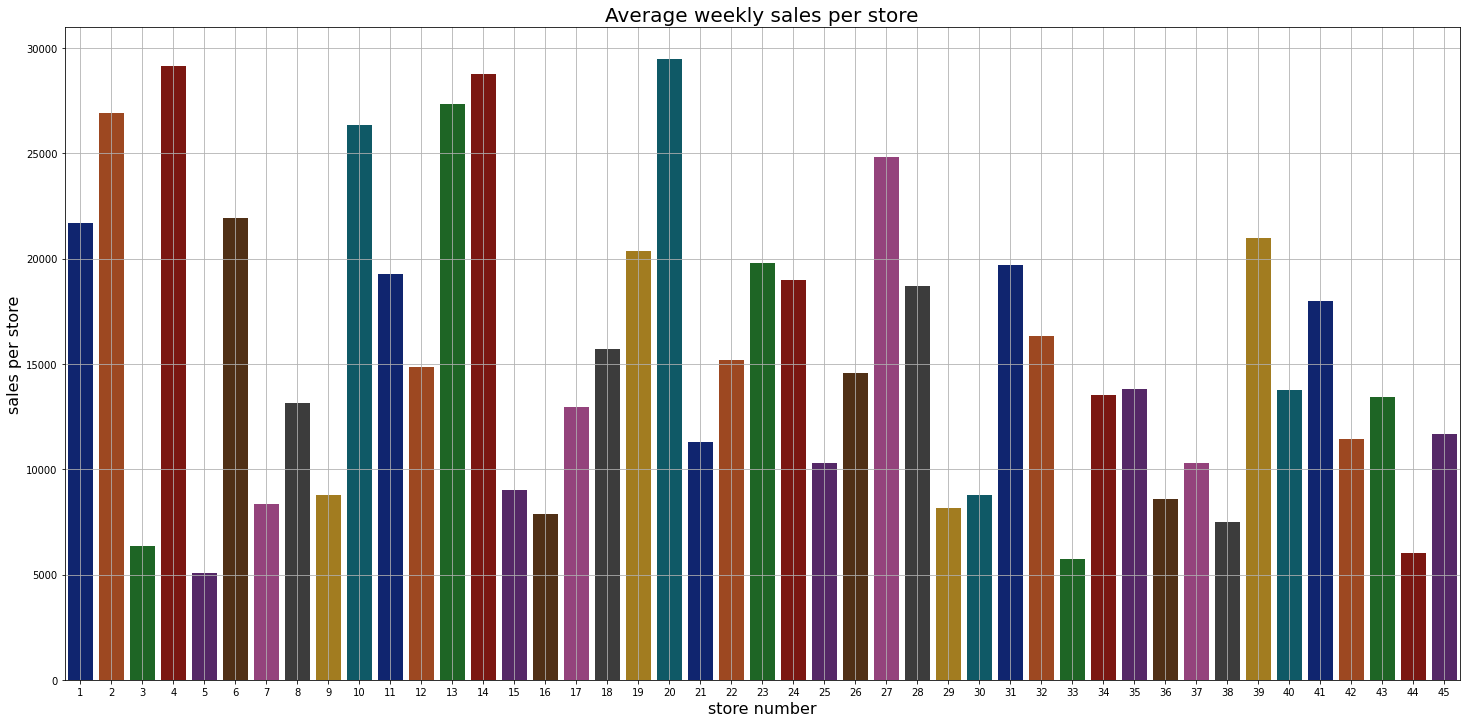

In [ ]:
# plotting the figure
plt.figure(figsize=(25,12))
# create a barplot with stores in x axis and mean weekly sales in y axis
sns.barplot(weekly_sales_stores.index, weekly_sales_stores.values, palette='dark')
plt.grid()
plt.title('Average weekly sales per store', fontsize=20)
plt.xlabel('store number',fontsize=16)
plt.ylabel('sales per store',fontsize=16)
plt.show()

GROUPING THE train_df_1 by DEPARTMENT AND COMPUTING THE MEAN OF weekly_Sales FOR EACH DEAPARTMENT

In [ ]:
weekly_sales_dept = train_df_1['Weekly_Sales'].groupby(train_df_1['Dept']).mean()

In [ ]:
weekly_sales_dept_df = pd.DataFrame(weekly_sales_dept)

In [ ]:
weekly_sales_dept_df.head()

,Weekly_Sales
Dept,
1,19213.485088
2,43607.020113
3,11793.698516
4,25974.630238
5,21365.583515


In [ ]:
#sorting the dataframe with respect to weekly sales in descending order
weekly_sales_dept_df.sort_values('Weekly_Sales',ascending=False).style.bar(align='left', width=98)

,Weekly_Sales
Dept,
92,75204.870531
95,69824.423080
38,61090.619568
72,50566.515417
65,45441.706224
90,45232.084488
40,44900.702727
2,43607.020113
91,33687.910758


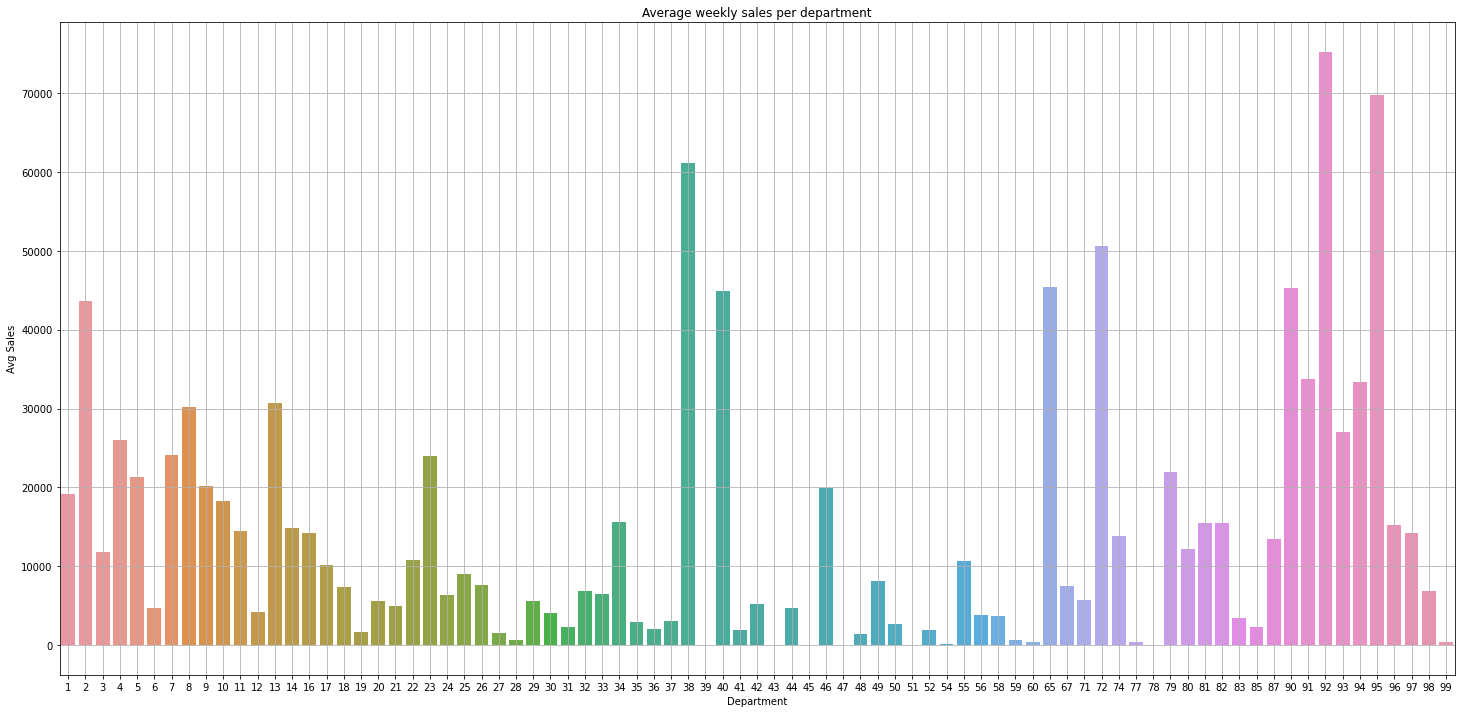

In [ ]:
plt.figure(figsize=(25,12))

sns.barplot(weekly_sales_dept.index, weekly_sales_dept.values)
plt.grid()
plt.title('Average weekly sales per department')
plt.xlabel('Department')
plt.ylabel('Avg Sales')
plt.show()

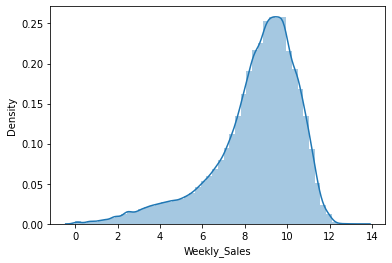

In [ ]:
# plotting the normal distribution where sales is greater than zero
train_sales = train_df_1[train_df_1['Weekly_Sales'] > 0]
train_lessthanzero = train_df_1[train_df_1['Weekly_Sales']<= 0]

# take natural log of data for sales more than zero
salesgreaterthanzero = np.log1p(train_sales['Weekly_Sales'])
sns.distplot(salesgreaterthanzero)

HEAT MAP

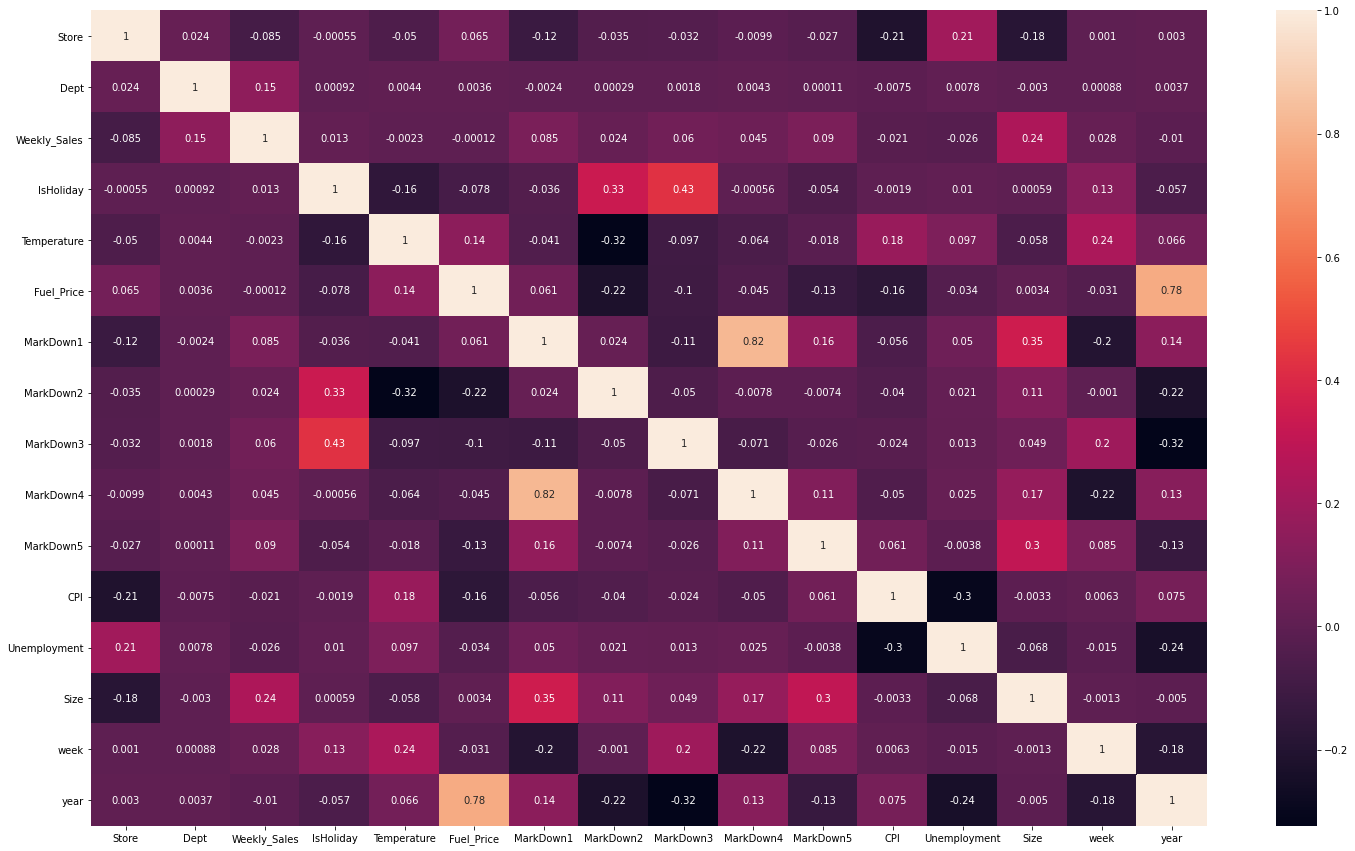

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(train_df_1.corr(), annot=True)